# Download the Data

This is what will download the data onto the colab document. 

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3' -O lendingclub.csv

--2022-02-12 20:02:44--  https://docs.google.com/uc?export=download&id=0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3
Resolving docs.google.com (docs.google.com)... 172.217.1.206, 2607:f8b0:4004:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.1.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ula5vo7g44lqoci10kh57obfsser7omj/1644696150000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download [following]
--2022-02-12 20:02:45--  https://doc-10-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ula5vo7g44lqoci10kh57obfsser7omj/1644696150000/09819396713149841370/*/0B5qTk6DHjanhOV9LRE5DY3l1T2pGemVBNTVQVzVsMlFCcHF3?e=download
Resolving doc-10-5c-docs.googleusercontent.com (doc-10-5c-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-10-5c-docs

# Introduction to homework 1
On Canvas (or in this notebook's files) you’ll find a new file, **lendingclub.csv**. Each row of this file represents a single user
account on **LendingClub.com**. The site consists of two types of users, **borrowers** who are applying for a new loan, and **investors** who lend money for fixed periods of time. Each row in our dataset represents a single borrower at the time they apply for their first peer-to-peer loan, and each row contains nine columns:

- Amount requested for their first loan
- Year the loan was requested (this dataset covers only a five-year period, 2008-2012)
- Title of the loan application (written by the borrower)
- FICO score (credit rating) of the borrower
- “Debt-to-Income”: A ratio of the borrower’s total monthly debt payments, excluding home
mortgage and the requested loan, to the borrower’s self-reported monthly income.
- ZIP code of the borrower (the last two digits of each ZIP are masked for anonymity)
- U.S. state that the borrower resides in.
- Length of time that the borrower has been employed at their current job, from 0 to 10+ years.
- A binary outcome variable for whether the user’s loan application was accepted by investors.

Our goal with this project will be to automatically predict whether a borrower will be approved for a loan from the investor members of the website, based only on the data provided above. For each of the following questions, add a series of code and markdown cells to develop an easily readable report responding to the question. 

# **Question 1** *(6 Points)*:


###1.1) Why is this data about users valuable to LendingClub? *(2 Points)*


The LendingClub company is providing a service where it matches borrowers to lenders. In order to create value for its customers, it is incentivized to understand when its product is successful. By knowing the input values that are likely to result in a successful loan, LendingClub can modify its platform and/or marketing to attract more prospective borrowers who are likely to successfully receive loans, or provide more guidance to prospective borrowers.

###1.2) Name at least two different ways this automated prediction could be used either for in-app product changes, or business decision-making. *(4 Points)*

1. If a borrower tries to list a loan request that is very unlikely to be fulfilled, the platform can prevent the request from going live and provide feedback to the borrower indicating that they should try again when their unfavorable features are improved (e.g. suggest they request a different amount of money, or wait until they have been employed longer).
2. Business leaders can decide to refine their online marketing strategy to target potential borrowers who are likely to successfully receive loans.

# **Question 2** *(14 Points)*: 
Train a decision tree classifier to predict loan acceptance based on the features provided. Write a report giving at minimum the following information on your model:
- Class distribution of the outcome labels.
- List of features you used from the data, including their name and data type (numeric or
nominal). For each feature, provide min, mean, and max values (if the feature is numeric) or
list all possible labels (if the feature is nominal).
- List of hyperparameter settings for the decision tree.
- Performance of the trained classifier, using metrics like accuracy, F1 score, precision, and recall. You must provide a labeled confusion matrix.

You should NOT perform any optimization; all you need to do is train a single decision tree and report results. You will be tuning hyperparameters and performing other evaluations in Homework 2. 

**Note**: There are two segments to each question two and three. One part should be the code, where you carry out what is required. The second part should be the description/written analysis/interpretation of your code.

##**Source Code** *(4 Points)*

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("lendingclub.csv")

##Inspecting and preparing the data

In [ ]:
df.head()

,amount,date,title,fico,dti,zip,state,emp_length,policy_code,year,outcome
0,2500.0,Dec-2011,bike,740.0,1.00,309xx,GA,< 1 year,1.0,2011,accept
1,12000.0,Dec-2011,Consolidation,675.0,10.78,913xx,CA,10+ years,1.0,2011,accept
2,21000.0,Dec-2011,Debt Cleanup,705.0,13.22,335xx,FL,10+ years,1.0,2011,accept
3,31825.0,Dec-2011,Debt Consolidation Loan,760.0,14.03,080xx,NJ,5 years,1.0,2011,accept
4,12000.0,Dec-2011,Debt Consolidation,725.0,16.70,088xx,NJ,10+ years,1.0,2011,accept


In [ ]:
#inspect columns to determine which are relevant for the decision tree
df.columns

Index(['amount', 'date', 'title', 'fico', 'dti', 'zip', 'state', 'emp_length',
       'policy_code', 'year', 'outcome'],
      dtype='object')

In [ ]:
df.dtypes

amount         float64
date            object
title           object
fico           float64
dti            float64
zip             object
state           object
emp_length      object
policy_code    float64
year             int64
outcome         object
dtype: object

In [ ]:
#Confirm that policy_code = 1 corresponds to outcome = accept and 0 corresponds to reject

df.groupby("outcome").mean()

,amount,fico,dti,policy_code,year
outcome,,,,,
accept,12492.550027,706.341806,15.187413,1.0,2011.233856
reject,13019.506016,589.716775,578.479662,0.0,2011.079462


In [ ]:
#Transform the employment length into a float variable

df["emp_length"].replace("< 1 year", 0, inplace=True)
df["emp_length"].replace("10+ years", 11, inplace=True)

emp_years = []

for i in np.arange(len(df.emp_length)):
  years_string = str(df.iloc[i, 7]).split()
  years_float = float(years_string[0])
  emp_years.append(years_float)

df["emp_years"] = emp_years

In [ ]:
#Discard columns that will not be used to train or evaluate the model

df.drop(columns = ["date", "title", "zip", "state", "emp_length", "year", "outcome"], inplace=True)

##Training the model

In [ ]:
#https://www.datacamp.com/community/tutorials/decision-tree-classification-python

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Define the data to be used
X = df.loc[:, ["amount", "fico", "dti", "emp_years"]]
y = df.policy_code

#Split the data into testing and training groups, with 30% designated as test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
#Train decision tree classifier

clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

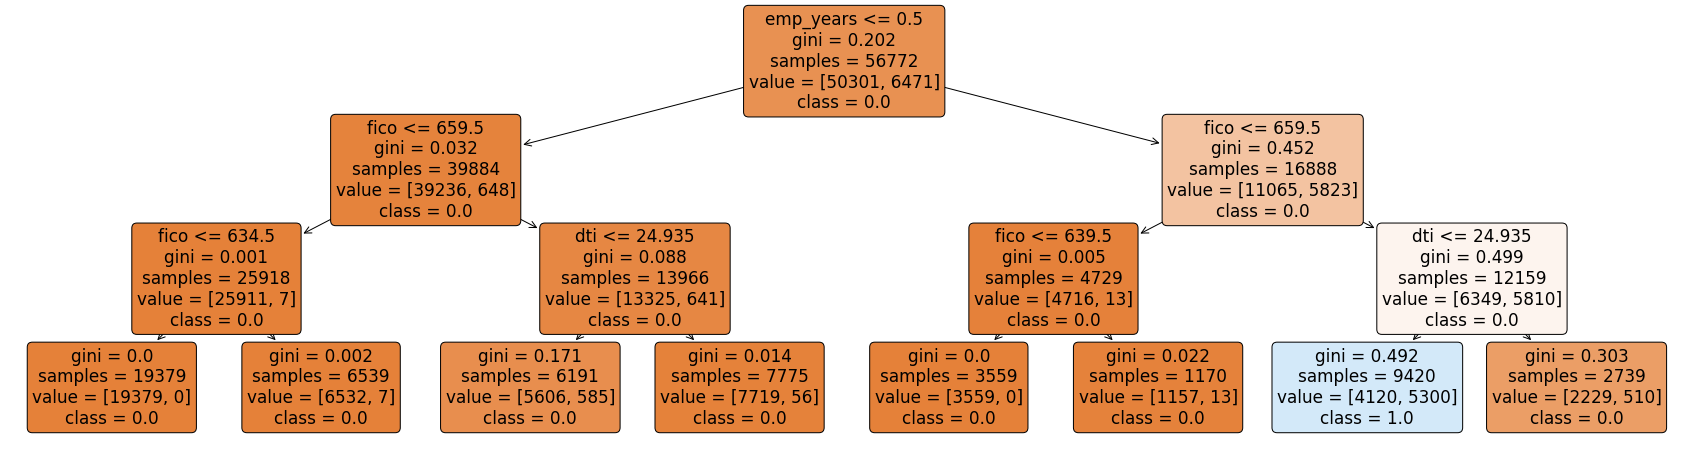

In [ ]:
#Inspect a smaller version of the tree, in which max_depth=3,
#to be able to understand what is happening in a manageable way

from sklearn import tree
import matplotlib.pyplot as plt

clf_3 = DecisionTreeClassifier(max_depth=3)
clf_3 = clf_3.fit(X_train,y_train)

plt.figure(figsize=(30,8))
tree.plot_tree(clf_3, 
               filled=True, 
               rounded=True, 
               class_names = [str(clf.classes_[0]),str(clf.classes_[1])],
               feature_names = ["amount", "fico", "dti", "emp_years"])
plt.show()

##Testing and evaluating the model

* Class distribution of the outcome labels.
* List of features you used from the data, including their name and data type (numeric or nominal). For each feature, provide min, mean, and max values (if the feature is numeric) or list all possible labels (if the feature is nominal).
* List of hyperparameter settings for the decision tree.
* Performance of the trained classifier, using metrics like accuracy, F1 score, precision, and recall. You must provide a labeled confusion matrix.

In [ ]:
#Names of the outcome labels
clf.classes_

array([0., 1.])

In [ ]:
#How many were accepted and rejected in the original dataset?
df.groupby("policy_code").count()

,amount,fico,dti,emp_years
policy_code,,,,
0.0,71858,71858,71858,71858
1.0,9245,9245,9245,9245


In [ ]:
#Class distribution of the outcome labels
number_accepted = df.groupby("policy_code").count().iloc[1, 0]
number_rejected = df.groupby("policy_code").count().iloc[0, 1]

print(f"{number_accepted} applications were accepted ({round(100*number_accepted/(number_accepted + number_rejected))}%).")
print(f"{number_rejected} applications were rejected ({round(100*number_rejected/(number_accepted + number_rejected))}%).")

9245 applications were accepted (11%).
71858 applications were rejected (89%).


In [ ]:
#For each feature, provide min, mean, and max values
df.describe()

,amount,fico,dti,policy_code,emp_years
count,81103.000000,81103.000000,8.110300e+04,81103.000000,81103.000000
mean,12959.437855,603.010961,5.142695e+02,0.113991,1.689777
std,10315.880464,173.772811,1.700466e+04,0.317802,3.279803
min,500.000000,0.000000,-1.000000e+00,0.000000,0.000000
25%,5000.000000,585.000000,6.530000e+00,0.000000,0.000000
50%,10000.000000,653.000000,1.648000e+01,0.000000,0.000000
75%,20000.000000,691.000000,2.888000e+01,0.000000,2.000000
max,500000.000000,850.000000,3.418800e+06,1.000000,11.000000


[[20498  1059]
 [  729  2045]]


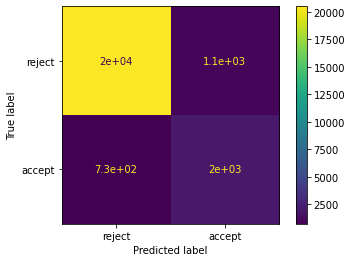

In [ ]:
#Provide a labeled confusion matrix.

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["reject", "accept"])
disp.plot()

In [ ]:
#Calculate performance metrics like accuracy, F1 score, precision, and recall. 

tp = cm[1, 1]
tn = cm[0, 0]
fn = cm[1, 0]
fp = cm[0, 1]

accuracy = round((tp+tn)/(tp+fp+tn+fn), ndigits=2)
precision = round(tp/(tp+fp), ndigits=2)
recall = round(tp/(tp+fn), ndigits=2)
specificity = round(tn/(tn+fp), ndigits=2)

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

f1score = round(2 * (precision * recall) / (precision + recall), ndigits=2)

In [ ]:
print(f"The accuracy of the model is {accuracy}.")
print(f"The precision of the model is {precision}.")
print(f"The recall of the model is {recall}.")
print(f"The specificity of the model is {specificity}.")
print(f"The F1 score of the model is {f1score}.")

The accuracy of the model is 0.93.
The precision of the model is 0.66.
The recall of the model is 0.74.
The specificity of the model is 0.95.
The F1 score of the model is 0.7.


In [ ]:
#Determine how common false negatives are, because they have a high cost in my first business case.

fn/(fn+fp+tn+tp)

0.029961777156713658

###2.1 Class Distribution of Outcome Labels *(2 Points)*

Describe the class labels in your dataset

The two classes are 0 (corresponds to "rejected") and 1 (corresponds to "accepted"). The data showed an 11% acceptance rate.

###2.2 Describe the features used by your model *(2 Points)*

Describe the feature labels in your dataset

I used four features, all of them numeric. These were :
* "amount" (how much loan money was being requested, a float)
  * mean: ~$12,959.44

  * min: $500.00

  * max: $500,000.00
* "fico" (the potential borrower's FICO credit score, a float)
  * mean: ~603
  * min: 0
  * max: 850
* "dti" (the potential borrower's debt-to-income ratio, a float)
  * mean: ~514
  * min: -1
  * max: 3,418,800
* "emp_years" (how many years the potential borrower had been employed, an integer)
  * mean: ~1.69
  * min: 0 (NOTE: amounts < 1 year were recoded as 0)
  * max: 11 (NOTE: amounts > 10 years were recoded as 11)

###2.3 Classifier Details *(2 Points)*

Describe the classification algorithm used for your decision tree

Most of the hyperparameter settings for the decision tree are the default settings. For example, the Gini impurity is used to determine the quality of each split, the best splitter is used, and I did not assign weights to the input features. The hyperparameter that is different from the default is the max_depth, which is set to 10 in order to limit the size of the decision tree. 

###2.4 Performance Metrics *(4 Points)*

Describe the performance of your trained model, including multiple metrics of quality

The accuracy of the model is 0.93.
The precision of the model is 0.66.
The recall of the model is 0.72.
The specificity of the model is 0.95.
The F1 score of the model is 0.69.

This performance is fairly strong, and is likely to be helpful for decision making. That said, with some tweaking it could likely be improved.

# **Question 3** *(4 Points)*:
Is the decision tree that you trained accurate enough to be used for each of the two business purposes you proposed in question 1? Why or why not?

*1. If a borrower tries to list a loan request that is very unlikely to be fulfilled, the platform can prevent the request from going live and provide feedback to the borrower indicating that they should try again when their unfavorable features are improved (e.g. suggest they request a different amount of money, or wait until they have been employed longer).*

**Yes.** For this business case, there is a high penalty for a false negative, but a low penalty for a false positive. If someone who would have gotten a loan is discouraged from submitting their application, the website and users are missing out on a successful interaction. About 3% of test data points resulted in a false negative; this is low enough that I would feel comfortable using this decision tree for this circumstance. 

*2. Business leaders can decide to refine their online marketing strategy to target potential borrowers who are likely to successfully receive loans.*

**Yes.** For this business case, any amount of targeting is likely to result in more efficient use of advertising dollars. Business leaders could try to target potential borrowers with characteristics that indicate they will likely perform well when requesting a loan (if they are able to obtain that consumer information in an ethical and legal way). Since the model is 93% accurate, it captures overall trends and can help with marketing decisions.

#**Rubric**

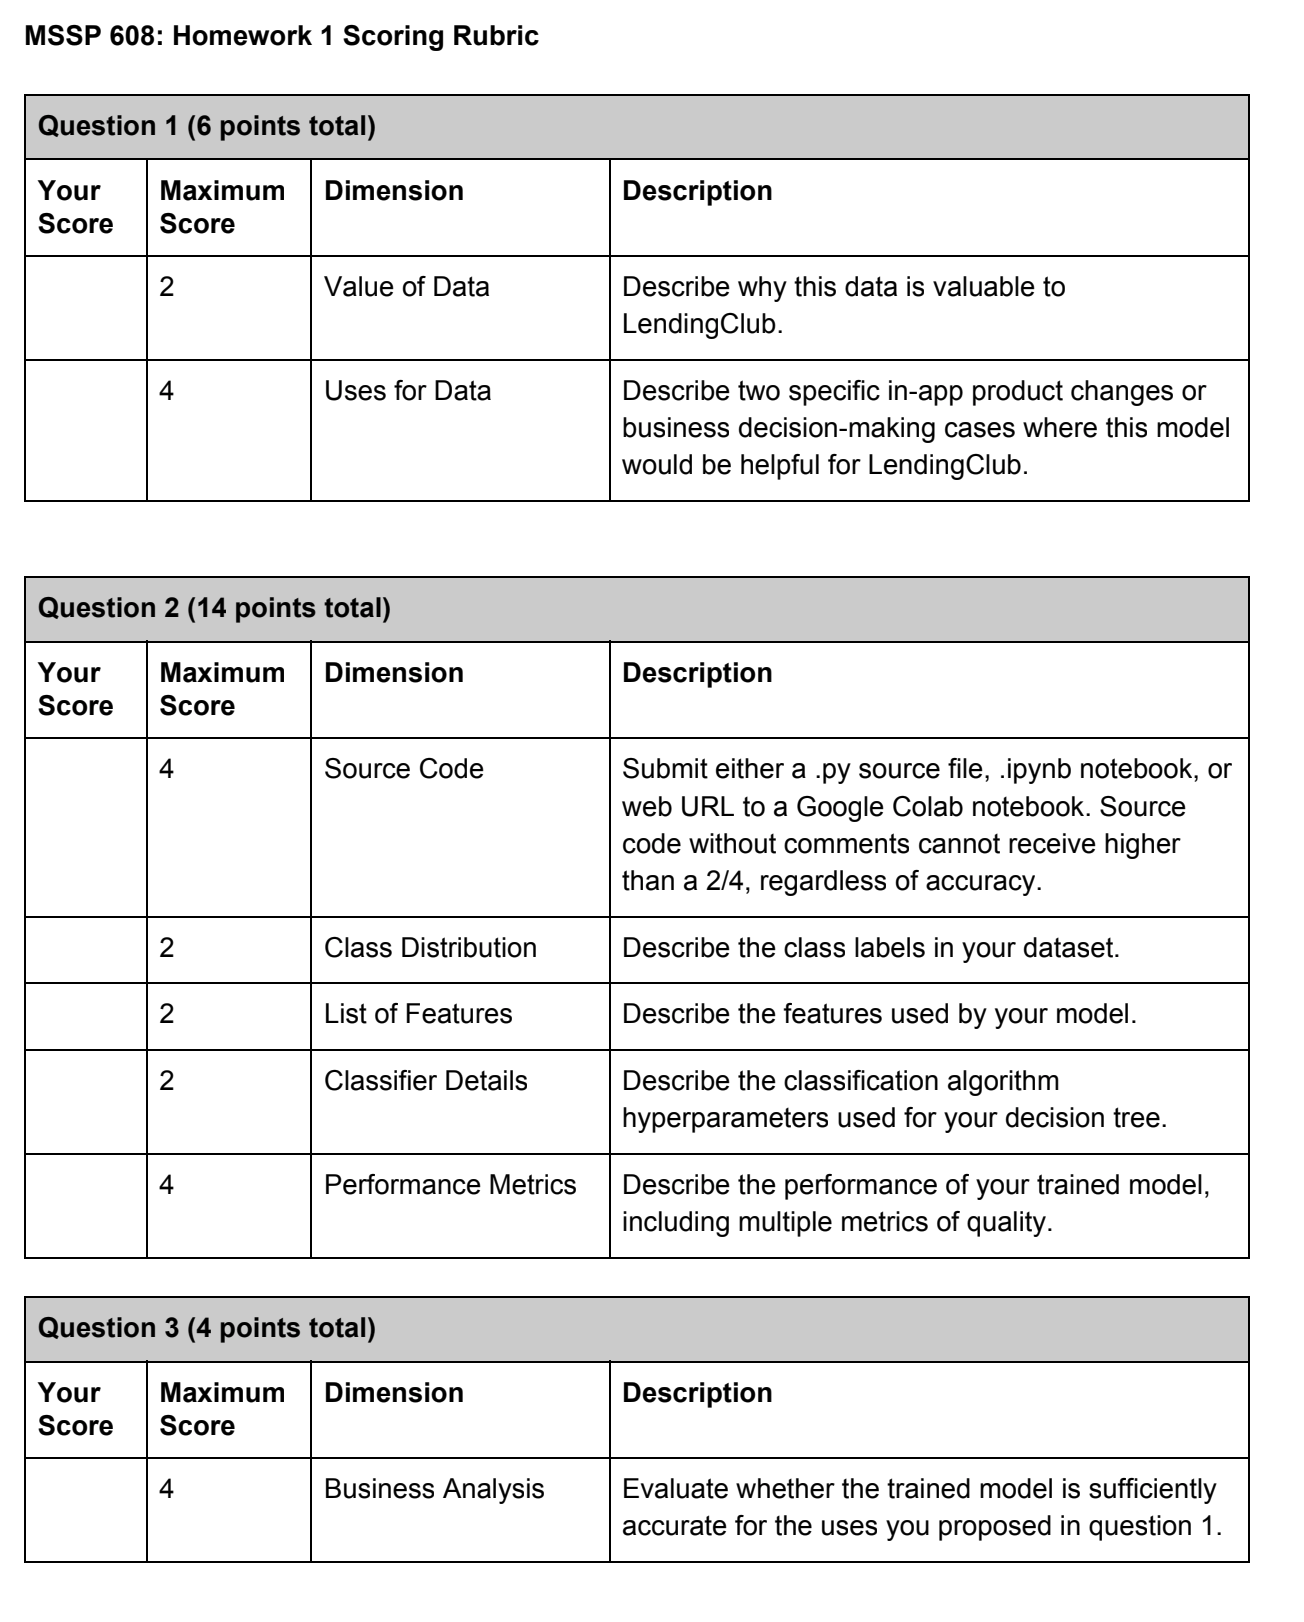